**下载（加载）MNIST数据集，并查看数据集的内容**

In [1]:
#import tensorflow.compat.v1 as tf #使用1.0版本的方法
#tf.disable_v2_behavior() #禁用2.0版本的方法

In [2]:
import numpy as np
import pandas as pd
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
from keras.datasets import mnist

In [4]:
#下载MNIST数据集
#训练数据（训练特征 训练标签） + 测试数据（测试特征 测试标签）
#返回训练部分和测试部分
(train_image, train_label), (test_image, test_label) = mnist.load_data()

In [5]:
#查看训练数据和测试数据的大小
print('train_data = ', len(train_image))
print('test_data = ', len(test_image))

train_data =  60000
test_data =  10000


In [6]:
train_image[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
#查看图片样式
print('train_image = ', train_image.shape)
print('train_label = ', train_label.shape)

train_image =  (60000, 28, 28)
train_label =  (60000,)


In [8]:
#编写一个函数查看数据集中的图片
import matplotlib.pyplot as plt
def show_mnisr_image(image):
    plt.imshow(image, cmap = 'gray')
    plt.show

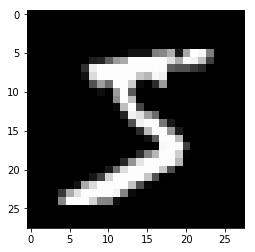

In [9]:
show_mnisr_image(train_image[0])

In [10]:
#查看train_image[0]对应的标签
print(train_label[0])

5


**数据预处理
神经网络模型：输入层（一维）--隐藏层（多维）--输出层（多维）**

In [11]:
train_image_matric = train_image.reshape(60000, 784).astype(float)
test_image_matric = test_image.reshape(10000, 784).astype(float)

In [12]:
#查看修改后的图片
print('train_image_matric = ', train_image_matric.shape)
print('test_image_matric = ', test_image_matric.shape)
print(train_image_matric[0])

train_image_matric =  (60000, 784)
test_image_matric =  (10000, 784)
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 25

In [13]:
#数据集的标准化——归一化处理，去除量纲影响，让所有数据落在0~1之间

In [14]:
train_image_normalize = train_image_matric / 255
test_image_normalize = test_image_matric / 255

In [15]:
print(train_image_normalize[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [16]:
#一位有效编码处理标签
train_label_onehotencoding = np_utils.to_categorical(train_label)
test_label_onehotencoding = np_utils.to_categorical(test_label)

In [17]:
print(train_label_onehotencoding[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


**多层感知器模型MLP**


$输入层: 28*28 = 784$


$隐藏层：多少隐藏层？多少神经单元？$


$输出层: 10（0到9)$

$$h_1=激活函数（xw_1+b_1）  （激活函数：relu）$$
$$y=激活函数（h_1w_2+b_2）  （激活函数：softmax，输出概率分布）$$

$权重w和偏差b由数学模型正态分布随机产生$


In [18]:
from keras.models import Sequential  #线性堆叠模型
from keras.layers import Dense       #神经网络

In [19]:
model = Sequential() #建立线性堆叠的神经网络模型

建立输入层和隐藏层之间的关系

In [20]:
#units 隐藏层中神经单元的个数  input_dim 输入层神经单元的个数  normal正态分布产生权重和偏差
model.add(Dense(units = 256, input_dim = 784, kernel_initializer  = 'normal', activation = 'relu'))

建立隐藏层和输出层之间的关系

In [21]:
model.add(Dense(units = 10, kernel_initializer  = 'normal', activation = 'softmax'))

In [22]:
#每一层神经单元的关联：上一层神经单元格数*本层神经单元个数 + 本层神经单元个数
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


**进行训练**

In [23]:
#配置训练模型 loss：损失函数 optimizer：优化器，让训练结果尽快收敛
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [24]:
#train_image_nomalize训练数据  train_label_onehotencoding训练标签  validation_split取出一定比例进行验证  
#epochs训练次数  batch_size每次训练数据量  verbose显示训练过程
train_history = model.fit(train_image_normalize, train_label_onehotencoding, validation_split=0.2, epochs=10, batch_size=200, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 1s - loss: 0.4387 - accuracy: 0.8824 - val_loss: 0.2230 - val_accuracy: 0.9388
Epoch 2/10
 - 1s - loss: 0.1907 - accuracy: 0.9457 - val_loss: 0.1648 - val_accuracy: 0.9540
Epoch 3/10
 - 1s - loss: 0.1362 - accuracy: 0.9611 - val_loss: 0.1317 - val_accuracy: 0.9647
Epoch 4/10
 - 1s - loss: 0.1044 - accuracy: 0.9709 - val_loss: 0.1151 - val_accuracy: 0.9663
Epoch 5/10
 - 1s - loss: 0.0847 - accuracy: 0.9762 - val_loss: 0.1053 - val_accuracy: 0.9684
Epoch 6/10
 - 1s - loss: 0.0683 - accuracy: 0.9818 - val_loss: 0.0932 - val_accuracy: 0.9713
Epoch 7/10
 - 1s - loss: 0.0566 - accuracy: 0.9842 - val_loss: 0.0898 - val_accuracy: 0.9736
Epoch 8/10
 - 1s - loss: 0.0472 - accuracy: 0.9871 - val_loss: 0.0874 - val_accuracy: 0.9734
Epoch 9/10
 - 1s - loss: 0.0391 - accuracy: 0.9892 - val_loss: 0.0878 - val_accuracy: 0.9726
Epoch 10/10
 - 1s - loss: 0.0328 - accuracy: 0.9919 - val_loss: 0.0827 - val_accuracy: 0.9738


In [25]:
print(train_history.history['accuracy'])
print('--------------------------------------------------------------')
print(train_history.history['val_accuracy'])
print('--------------------------------------------------------------')
print(train_history.history['loss'])
print('--------------------------------------------------------------')
print(train_history.history['val_loss'])

[0.8824375, 0.9457292, 0.9611458, 0.970875, 0.9762083, 0.98183334, 0.9841667, 0.987125, 0.98920834, 0.9919375]
--------------------------------------------------------------
[0.9387500286102295, 0.9539999961853027, 0.9647499918937683, 0.9662500023841858, 0.968416690826416, 0.9713333249092102, 0.9735833406448364, 0.9734166860580444, 0.9725833535194397, 0.9738333225250244]
--------------------------------------------------------------
[0.43866911542912324, 0.1907367566290001, 0.13615937700184683, 0.10444286515315374, 0.08471336720200877, 0.06825841558165849, 0.05656106139843663, 0.047202981814431645, 0.03908399242597322, 0.03278809866751544]
--------------------------------------------------------------
[0.2230171990270416, 0.1648469247544805, 0.13173484684278566, 0.11513850210855404, 0.10528713803117475, 0.09322362934083989, 0.0898419155816858, 0.0873680826354151, 0.0877591834946846, 0.08271619630201409]


In [26]:
import matplotlib.pyplot as plt
def show_train_history(history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.xlabel('Epoch')
    plt.ylabel(train)
    plt.legend(['train', 'validation'], loc = 'upper left')
    plt.show()
    

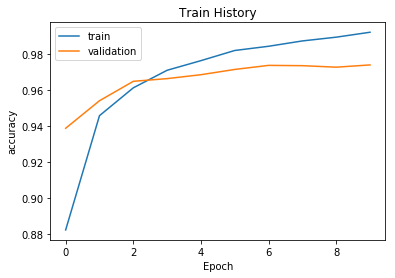

In [27]:
show_train_history(train_history, 'accuracy', 'val_accuracy')

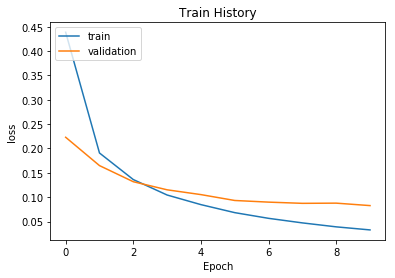

In [28]:
show_train_history(train_history, 'loss', 'val_loss')

**利用10000项测试数据评估模型准确率**

In [29]:
scores = model.evaluate(test_image_normalize, test_label_onehotencoding)
print(scores)

10000/10000 [==============================] - 0s 36us/step
[0.07162738090669736, 0.9779000282287598]
